In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score
from random import choices


In [139]:
np.random.seed(400)


n_samples=300
n_features=2
n_centers=6
cluster_std=0.8


X , Y= make_blobs(n_samples,n_features,centers=n_centers,cluster_std=cluster_std,random_state=400)


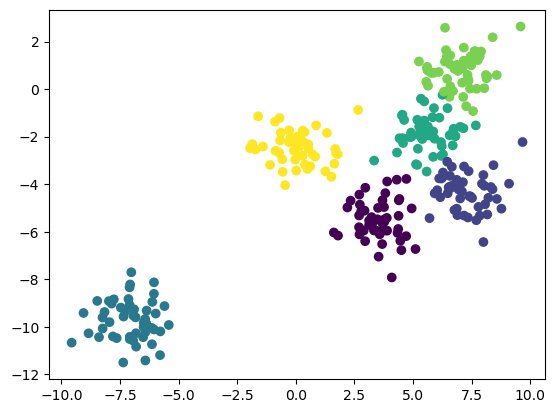

In [140]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [ ]:
# def k_means_iter(X ,K,tol=1e-4):
#     Centers=np.array(choices(population=X, k=K)) # choise clusters randoly
#     Labels=np.zeros(len(X),dtype=int)
#     while True:
#         for i in range (len(X)):
#             distances=np.array([np.linalg.norm(c-X[i]) for c in Centers ])
#             Labels[i]=distances.argmin()
#         prev_center = Centers.copy()
#         for j in range(K):
#             datawlabel= X[Labels==j]
#             if len(datawlabel) > 0 :
#                 Centers[j]= np.mean(datawlabel,axis=0)
#             else :
#                 Centers[j]= X[np.random.randint(0,len(X))]
#         covergence=np.linalg.norm(Centers-prev_center)
#         if covergence < tol:
#             break
#     return Centers,Labels
        
def k_means_iter(X ,K,tol=1e-4,m=100):
    Centers=np.array(choices(population=X, k=K)) # choise clusters randoly
    Labels=np.random.randint(0,K,len(X))
    for ite in range(m):
        for i in range (len(X)):
            distances=np.array([np.linalg.norm(c-X[i]) for c in Centers ])
            Labels[i]=distances.argmin()
        prev_center=Centers.copy()
        for j in range(len(Centers)):
            datawlabel= [ X[i] for i in range(len(X)) if j == Labels[i] ]
            Centers[j] = sum(datawlabel)/len(datawlabel)
            
        covergence=np.linalg.norm(Centers-prev_center)
        if covergence < tol:
            print(f"covergence in {ite} iterations")
            break
    return Centers,Labels
        
    


covergence in 7 iterations


In [176]:
C,L=k_means_iter(X,4)


covergence in 6 iterations


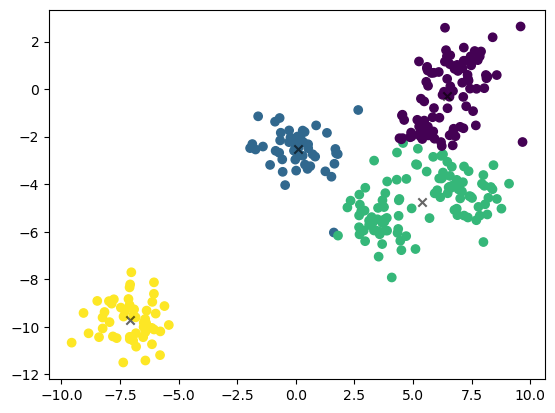

In [177]:
plt.scatter(X[:,0],X[:,1],c=L)
plt.scatter(C[:,0],C[:,1],marker='x',c='black',alpha=0.6)

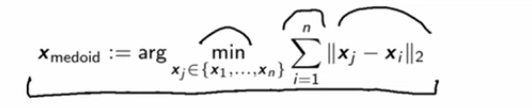

In [ ]:
def k_medoids(X ,K,tol=1e-4,m=100):
    Centers=np.array(choices(population=X, k=K)) # choise clusters randoly
    Labels=np.zeros(len(X),dtype=int)
    for ite in range(m):
        for i in range (len(X)):
            distances=np.array([np.linalg.norm(c-X[i]) for c in Centers ])
            Labels[i]=distances.argmin()
        prev_center = Centers.copy()
        for j in range(K):
            cluster_points= X[Labels==j]
            if len(cluster_points) == 0:  # Empty cluster? Reassign randomly
                Centers[j] = X[np.random.randint(0, len(X))]
                continue
            # pari_wise_distances=np.sum( [[ np.linalg.norm(p1-p2) for p2 in cluster_points] for p1 in cluster_points],axis=1)
            distances = []
            s=0
            for d in cluster_points:
                s+=sum([ np.linalg.norm(d-cluster_points[i]) for i in range(len(cluster_points)) ])
                distances.append(s)
                s=0
            distances = np.array(distances)
            arg_medios=distances.argmin()
            Centers[j]=cluster_points[arg_medios]
        covergence=np.linalg.norm(Centers-prev_center)
        if covergence < tol:
            print(f"covergence in {ite} iterations")
            break
    return Centers,Labels



covergence in 9 iterations


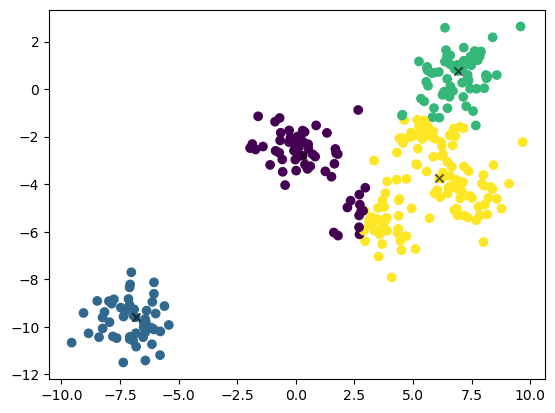

In [199]:
C,L=k_medoids(X,4)
plt.scatter(X[:,0],X[:,1],c=L)
plt.scatter(C[:,0],C[:,1],marker='x',c='black',alpha=0.6)